<a href="https://colab.research.google.com/github/GuyFarb/Cars-Project/blob/main/Get_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
data_dir = "/content/drive/MyDrive/Car196_project/data/"
!ls "/content/drive/MyDrive/Car196_project/data"
# ◊ê◊ô◊™◊ï◊® ◊õ◊ú ◊ß◊ï◊ë◊¶◊ô ◊î-TFRecord ◊ë◊™◊ô◊ß◊ô◊ô◊î
train_files = glob.glob(data_dir + "cars196-train.tfrecord-*")
test_files = glob.glob(data_dir + "cars196-test.tfrecord-*")

# ◊î◊¶◊í◊™ ◊®◊©◊ô◊û◊™ ◊î◊ß◊ë◊¶◊ô◊ù ◊©◊†◊û◊¶◊ê◊ï
print("üìÇ ◊ß◊ë◊¶◊ô ◊ê◊ô◊û◊ï◊ü:", train_files)
print("üìÇ ◊ß◊ë◊¶◊ô ◊ë◊ì◊ô◊ß◊î:", test_files)

cars196-test.tfrecord-00000-of-00008   cars196-train.tfrecord-00002-of-00008
cars196-test.tfrecord-00001-of-00008   cars196-train.tfrecord-00003-of-00008
cars196-test.tfrecord-00002-of-00008   cars196-train.tfrecord-00004-of-00008
cars196-test.tfrecord-00003-of-00008   cars196-train.tfrecord-00005-of-00008
cars196-test.tfrecord-00004-of-00008   cars196-train.tfrecord-00006-of-00008
cars196-test.tfrecord-00005-of-00008   cars196-train.tfrecord-00007-of-00008
cars196-test.tfrecord-00006-of-00008   dataset_info.json
cars196-test.tfrecord-00007-of-00008   image.image.json
cars196-train.tfrecord-00000-of-00008  label.labels.txt
cars196-train.tfrecord-00001-of-00008
üìÇ ◊ß◊ë◊¶◊ô ◊ê◊ô◊û◊ï◊ü: ['/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00000-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00001-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00002-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-

In [4]:
# ◊ß◊ï◊ë◊• ◊ú◊ì◊ï◊í◊û◊î
tfrecord_file = "/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00000-of-00008"

# ◊ô◊¶◊ô◊®◊™ dataset ◊ú◊ß◊®◊ô◊ê◊î
raw_dataset = tf.data.TFRecordDataset([tfrecord_file])

# ◊î◊¶◊í◊™ ◊®◊©◊ï◊û◊î ◊®◊ê◊©◊ï◊†◊î ◊õ◊ì◊ô ◊ú◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊û◊ë◊†◊î
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "label"
    value {
      int64_list {
        value: 194
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\002\000\034\000\034\000\000\377\342\031\374ICC_PROFILE\000\001\001\000\000\031\354appl\002\020\000\000mntrRGB XYZ \007\332\000\006\000\027\000\024\000\014\000,acspAPPL\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\366\326\000\001\000\000\000\000\323-appl\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\021desc\000\000\001P\000\000\000bdscm\000\000\001\264\000\000\002Bcprt\000\000\003\370\000\000\000\320wtpt\000\000\004\310\000\000\000\024rXYZ\000\000\004\334\000\000\000\024gXYZ\000\000\004\360\000\000\000\024bXYZ\000\000\005\004\000\000\000\024rTRC\000\000\005\030\000\000

In [5]:
def parse_tfrecord(example):
  feature_description = {
      'image':tf.io.FixedLenFeature([],tf.string),
      'label':tf.io.FixedLenFeature([],tf.int64)
  }

  example = tf.io.parse_single_example(example,feature_description)
  image = tf.image.decode_jpeg(example['image'],channels=3)
  image = tf.image.resize(image,(224,224))
  image = tf.cast(image,tf.float32)/255.0

  label = example['label']
  return image,label

In [6]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# ◊ò◊¢◊ô◊†◊™ ◊ß◊ï◊ë◊¶◊ô ◊î-TFRecord
train_dataset = tf.data.TFRecordDataset(train_files)
test_dataset = tf.data.TFRecordDataset(test_files)

# ◊§◊¢◊†◊ï◊ó ◊î◊ß◊ï◊ë◊• ◊ï◊î◊í◊ì◊®◊™ ◊î-Pipeline
train_dataset = (train_dataset
    .map(parse_tfrecord, num_parallel_calls=AUTOTUNE)
    .shuffle(1000)  # ◊¢◊®◊ë◊ï◊ë ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊ú◊û◊ô◊ì◊™ ◊ô◊™◊®
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

test_dataset = (test_dataset
    .map(parse_tfrecord, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

print("‚úÖ ◊î◊ì◊ê◊ò◊î ◊û◊ï◊õ◊ü ◊ú◊ê◊ô◊û◊ï◊ü!")

‚úÖ ◊î◊ì◊ê◊ò◊î ◊û◊ï◊õ◊ü ◊ú◊ê◊ô◊û◊ï◊ü!


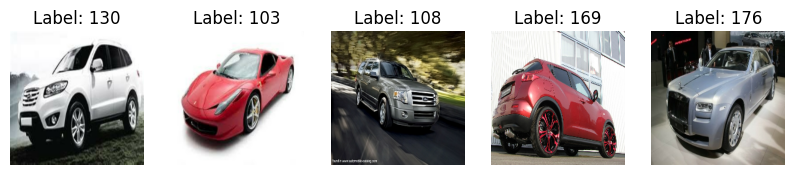

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for images, labels in train_dataset.take(1):  # ◊ú◊ï◊ß◊ó ◊ë◊ê◊¶' ◊®◊ê◊©◊ï◊ü
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i].numpy())  # ◊î◊¶◊í◊™ ◊™◊û◊ï◊†◊î
        plt.title(f"Label: {labels[i].numpy()}")  # ◊î◊¶◊í◊™ ◊™◊ï◊ï◊ô◊™
        plt.axis("off")

plt.show()

#counter

In [ ]:
train_count = sum(1 for _ in train_dataset)
test_count = sum(1 for _ in test_dataset)

print(f"üî¢ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ê◊ô◊û◊ï◊ü: {train_count}")
print(f"üî¢ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ë◊ì◊ô◊ß◊î: {test_count}")

KeyboardInterrupt: 

#distribiotion

In [ ]:
import collections
label_counts = collections.defaultdict(int)

for _, labels in train_dataset:
  for label in labels.numpy():
    label_counts[label]+=1


print(f"◊û◊°◊§◊® ◊û◊ó◊ú◊ß◊ï◊™/◊°◊ï◊í◊ô ◊®◊õ◊ë◊ô◊ù {len(label_counts)}")

list(label_counts.items())[:10]

◊û◊°◊§◊® ◊û◊ó◊ú◊ß◊ï◊™/◊°◊ï◊í◊ô ◊®◊õ◊ë◊ô◊ù 196


[(95, 41),
 (100, 42),
 (72, 45),
 (177, 42),
 (166, 48),
 (117, 42),
 (21, 43),
 (27, 41),
 (148, 43),
 (68, 38)]

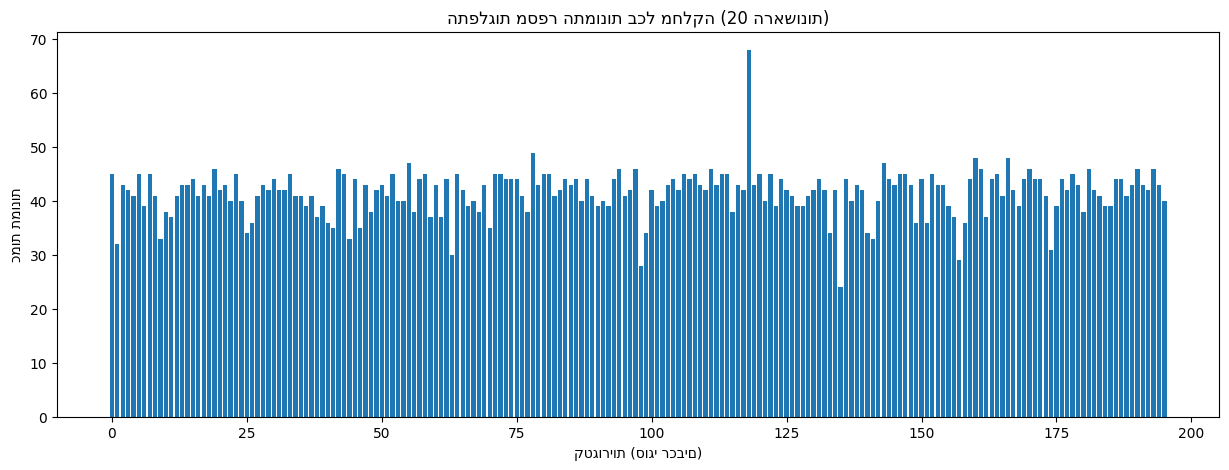

In [ ]:
import matplotlib.pyplot as plt

# ◊û◊ô◊ï◊ü ◊î◊û◊ó◊ú◊ß◊ï◊™ ◊ú◊§◊ô ◊û◊°◊§◊® ◊™◊û◊ï◊†◊ï◊™
sorted_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊î◊™◊§◊ú◊í◊ï◊™
plt.figure(figsize=(15,5))
plt.bar([x[0] for x in sorted_counts[:196]], [x[1] for x in sorted_counts[:196]])
plt.xlabel("◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ (◊°◊ï◊í◊ô ◊®◊õ◊ë◊ô◊ù)")
plt.ylabel("◊õ◊û◊ï◊™ ◊™◊û◊ï◊†◊ï◊™")
plt.title("◊î◊™◊§◊ú◊í◊ï◊™ ◊û◊°◊§◊® ◊î◊™◊û◊ï◊†◊ï◊™ ◊ë◊õ◊ú ◊û◊ó◊ú◊ß◊î (20 ◊î◊®◊ê◊©◊ï◊†◊ï◊™)")
plt.show()

In [8]:
def serialize_example(image, label):
    feature = {
        "image": tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(tf.cast(image * 255, tf.uint8)).numpy()])),
        "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[label.numpy()]))
    }
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    return example.SerializeToString()

# ◊†◊™◊ô◊ë ◊ú◊©◊û◊ô◊®◊™ ◊î◊ß◊ï◊ë◊•
tfrecord_path = "/content/drive/MyDrive/Car196_project/processed_cars196/cars196.tfrecord"

# ◊ô◊¶◊ô◊®◊™ TFRecord ◊ó◊ì◊©
with tf.io.TFRecordWriter(tfrecord_path) as writer:
    for image, label in train_dataset.unbatch():
        example = serialize_example(image, label)
        writer.write(example)

print(f"‚úÖ ◊î◊ß◊ï◊ë◊• {tfrecord_path} ◊†◊©◊û◊® ◊ë◊î◊¶◊ú◊ó◊î!")

‚úÖ ◊î◊ß◊ï◊ë◊• /content/drive/MyDrive/Car196_project/processed_cars196/cars196.tfrecord ◊†◊©◊û◊® ◊ë◊î◊¶◊ú◊ó◊î!


jpg&csv


In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# ◊†◊™◊ô◊ë ◊ú◊©◊û◊ô◊®◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊ë◊í◊ï◊í◊ú ◊ì◊®◊ô◊ô◊ë
drive_path = "/content/drive/MyDrive/Car196_project/processed_cars196/"
os.makedirs(drive_path, exist_ok=True)

image_dir = os.path.join(drive_path, "images")
os.makedirs(image_dir, exist_ok=True)

label_list = []

# ◊©◊û◊ô◊®◊™ ◊î◊™◊û◊ï◊†◊ï◊™ ◊ï◊î◊™◊ï◊ï◊ô◊ï◊™ ◊õ◊ß◊ë◊¶◊ô◊ù ◊†◊§◊®◊ì◊ô◊ù
for i, (image, label) in enumerate(train_dataset.unbatch()):  # ◊©◊û◊ô◊®◊™ 5000 ◊™◊û◊ï◊†◊ï◊™ ◊ú◊ì◊ï◊í◊û◊î
    image_array = (image.numpy() * 255).astype(np.uint8)  # ◊î◊ó◊ñ◊®◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊ú◊§◊ï◊®◊û◊ò 0-255
    label_value = int(label.numpy())

    # ◊©◊û◊ô◊®◊™ ◊î◊™◊û◊ï◊†◊î ◊ë◊§◊ï◊®◊û◊ò JPG ◊ë◊ì◊®◊ô◊ô◊ë
    image_path = os.path.join(image_dir, f"{i}.jpg")
    Image.fromarray(image_array).save(image_path)

    # ◊©◊û◊ô◊®◊™ ◊î◊™◊ï◊ï◊ô◊™
    label_list.append({"filename": f"{i}.jpg", "label": label_value})

# ◊©◊û◊ô◊®◊™ ◊î◊™◊ï◊ï◊ô◊ï◊™ ◊ë◊ß◊ï◊ë◊• CSV ◊ë◊ì◊®◊ô◊ô◊ë
df = pd.DataFrame(label_list)
df.to_csv(os.path.join(drive_path, "labels.csv"), index=False)

print(f"‚úÖ ◊†◊©◊û◊®◊ï {len(label_list)} ◊™◊û◊ï◊†◊ï◊™ ◊ï◊™◊ï◊ï◊ô◊ï◊™ ◊ë-Google Drive!")

#numpy


In [ ]:
import numpy as np


# ◊î◊û◊®◊™ ◊î◊ì◊ê◊ò◊î ◊ú◊®◊©◊ô◊û◊ï◊™ NumPy
images_list = []
labels_list = []

for image, label in train_dataset.unbatch():
    images_list.append(image.numpy())
    labels_list.append(label.numpy())

# ◊©◊û◊ô◊®◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊õ-Numpy ◊ë◊ì◊®◊ô◊ô◊ë
np.save("/content/drive/MyDrive/Car196_project/processed_cars196/images_np.npy", np.array(images_list))
np.save("/content/drive/MyDrive/Car196_project/processed_cars196/labels_np.npy", np.array(labels_list))

print("‚úÖ ◊î◊†◊™◊ï◊†◊ô◊ù ◊†◊©◊û◊®◊ï ◊ë◊î◊¶◊ú◊ó◊î ◊õ-Numpy ◊ë-Google Drive!")

In [23]:
import os

# ◊†◊™◊ô◊ë ◊ú◊™◊ô◊ß◊ô◊ô◊™ ◊î◊ì◊®◊ô◊ô◊ë
drive_path = "/content/drive/MyDrive/Car196_project/processed_cars196/"

# ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊ß◊ë◊¶◊ô◊ù ◊ß◊ô◊ô◊û◊ô◊ù
print("üìÇ ◊ß◊ë◊¶◊ô◊ù ◊ë◊™◊ô◊ß◊ô◊ô◊î:")
print(os.listdir(drive_path))

# ◊ë◊ì◊ô◊ß◊™ ◊ß◊ï◊ë◊¶◊ô Numpy (◊ê◊ù ◊ß◊ô◊ô◊û◊ô◊ù)
if os.path.exists(os.path.join(drive_path, "processed_cars196_images.npy")):
    print("‚úÖ ◊ß◊ï◊ë◊• ◊î◊™◊û◊ï◊†◊ï◊™ ◊ß◊ô◊ô◊ù!")
else:
    print("‚ùå ◊ß◊ï◊ë◊• ◊î◊™◊û◊ï◊†◊ï◊™ ◊ó◊°◊®!")

if os.path.exists(os.path.join(drive_path, "processed_cars196_labels.npy")):
    print("‚úÖ ◊ß◊ï◊ë◊• ◊î◊™◊ï◊ï◊ô◊ï◊™ ◊ß◊ô◊ô◊ù!")
else:
    print("‚ùå ◊ß◊ï◊ë◊• ◊î◊™◊ï◊ï◊ô◊ï◊™ ◊ó◊°◊®!")

üìÇ ◊ß◊ë◊¶◊ô◊ù ◊ë◊™◊ô◊ß◊ô◊ô◊î:
['processed_cars196.tfrecord', 'images', 'labels.csv']
‚ùå ◊ß◊ï◊ë◊• ◊î◊™◊û◊ï◊†◊ï◊™ ◊ó◊°◊®!
‚ùå ◊ß◊ï◊ë◊• ◊î◊™◊ï◊ï◊ô◊ï◊™ ◊ó◊°◊®!


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ◊ò◊¢◊ô◊†◊™ ◊ß◊ï◊ë◊¶◊ô Numpy
images = np.load(os.path.join(drive_path, "processed_cars196_images.npy"))
labels = np.load(os.path.join(drive_path, "processed_cars196_labels.npy"))

# ◊î◊¶◊í◊™ ◊û◊ô◊ì◊¢ ◊¢◊ú ◊î◊†◊™◊ï◊†◊ô◊ù
print(f"‚úÖ ◊õ◊û◊ï◊™ ◊î◊™◊û◊ï◊†◊ï◊™ ◊ë◊°◊ò ◊î◊ê◊ô◊û◊ï◊ü: {images.shape[0]}")
print(f"‚úÖ ◊í◊ï◊ì◊ú ◊™◊û◊ï◊†◊î ◊ú◊ì◊ï◊í◊û◊î: {images.shape[1:]}")  # ◊ê◊û◊ï◊® ◊ú◊î◊ô◊ï◊™ (224, 224, 3)
print(f"‚úÖ ◊õ◊û◊ï◊™ ◊î◊û◊ó◊ú◊ß◊ï◊™: {len(np.unique(labels))} (◊ê◊û◊ï◊® ◊ú◊î◊ô◊ï◊™ 196 ◊ß◊ò◊í◊ï◊®◊ô◊ï◊™)")

# ◊î◊¶◊í◊™ ◊û◊°◊§◊® ◊™◊û◊ï◊†◊ï◊™ ◊ú◊ë◊ì◊ô◊ß◊î
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # ◊î◊¶◊í◊™ ◊™◊û◊ï◊†◊î
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/processed_cars196/processed_cars196_images.npy'